# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. Do not forget, this is a Classification problem!

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

## Olusola Timothy Ogundepo

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Read csv
df = pd.read_csv('winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values

## Data overview

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From the description of this dataset, am highly interested in 2 features because of the differences between mean and max of both **total sulfur dioxide** and **free sulfur dioxide**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All the independent variable in this dataset are all $float64$ while the target variable is $int64$

In [6]:
df.shape

(1599, 12)

12 columns with 1599 observations

### Checking for NAN values or ?

In [7]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.apply(lambda x: x.isin(['?'])).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No NAN or unknown values in this dataset

# Exploratory Data Analysis

<AxesSubplot:xlabel='quality', ylabel='count'>

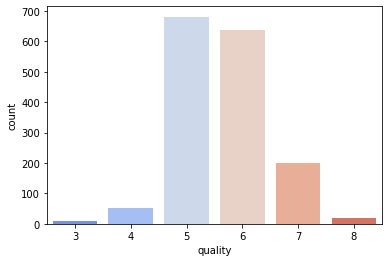

In [9]:
# Our label Distribution (countplot)
sns.countplot(data=df, x='quality', palette='coolwarm')

We could say that there is class imbalance in this dataset which will make our model to perform well on both 5 and 6 wine quality

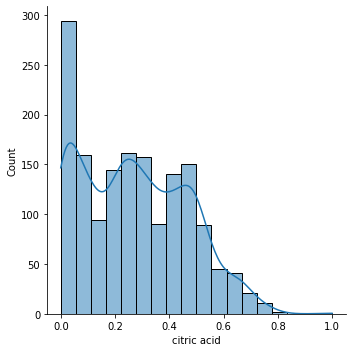

In [10]:
# Example EDA (distplot)
sns.displot(df['citric acid'], kde=True)

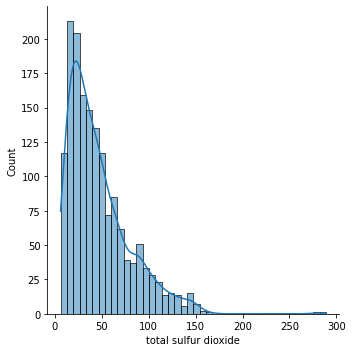

In [11]:
sns.displot(df['total sulfur dioxide'], kde=True)

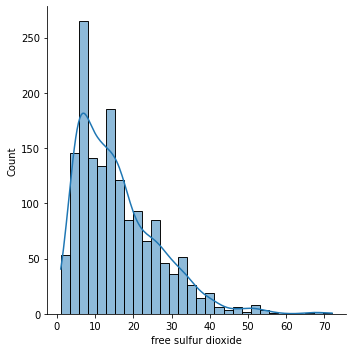

In [12]:
sns.displot(df['free sulfur dioxide'], kde=True)

This dataset is not normally distributed and it also contains outlier

<AxesSubplot:>

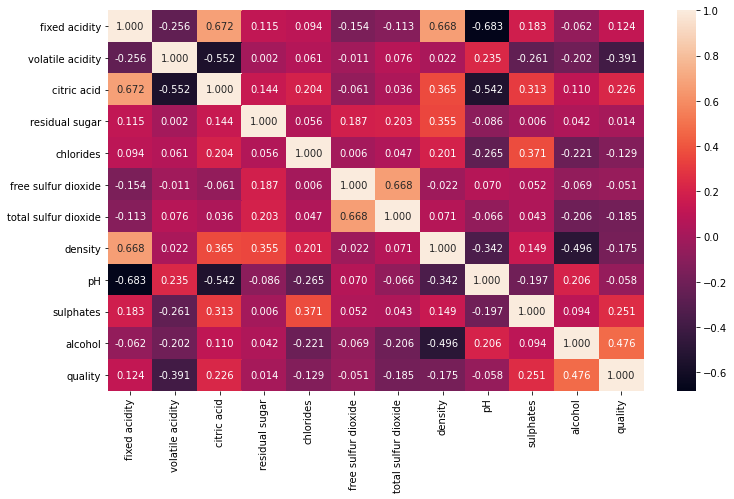

In [13]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, fmt='.3f')

From above visual, we could see the correlation in our dataset

# Preprocessing

In [14]:
from scipy.stats import zscore

In [15]:
np.sum((zscore(df) > 3))

174

We have 174 outliers in this dataset, which we need to remove to make our model perform well.

- Are there any duplicated values?

In [16]:
df.duplicated().sum()

240

We have 240 duplicated values in our dataset

- Do we need to do feature scaling?

This depends on which machine learning algorithm we wanted to use,

for example; if we want to use decision tree actually we don't need to do any feature scaling because it will handle it for us.
But for the case of this dataset, I will highly suggest we do feature scaling.

In [17]:
outliers = list(set(np.where(zscore(df) > 3)[0]))

In [18]:
new_df = df.drop(outliers,axis = 0)

In [19]:
def view(data):
    print(data.shape)
    display(data.head())

Before removing the outliers

In [20]:
view(df)

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


After removing the outliers

In [21]:
view(new_df)

(1463, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- Do we need to generate new features?

YES,
After we scale our dataset, we have to continue using the scale data

In [22]:
from sklearn.preprocessing import MinMaxScaler, scale

In [23]:
scaler = MinMaxScaler()
new_df.loc[:, :"alcohol"] = scaler.fit_transform(new_df.drop('quality', axis=1))

After scaling

In [24]:
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.282353,0.630435,0.000000,0.172414,0.299065,0.217391,0.201439,0.637263,0.724138,0.277108,0.192308,5
1,0.329412,0.826087,0.000000,0.293103,0.401869,0.521739,0.438849,0.554823,0.367816,0.421687,0.269231,5
2,0.329412,0.695652,0.050633,0.241379,0.373832,0.304348,0.345324,0.571311,0.436782,0.385542,0.269231,5
3,0.729412,0.173913,0.708861,0.172414,0.294393,0.347826,0.388489,0.653751,0.321839,0.301205,0.269231,6
4,0.282353,0.630435,0.000000,0.172414,0.299065,0.217391,0.201439,0.637263,0.724138,0.277108,0.192308,5


- Split Train and Test dataset. (0.7/0.3)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop(columns=['quality']), new_df['quality'], test_size=.3, random_state=42)

In [27]:
X_dftrain, X_dftest, y_dftrain, y_dftest = train_test_split(df.drop(columns=['quality']), df['quality'], test_size=.3, random_state=42)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [28]:
from sklearn.metrics import classification_report
def view_metrics(md):
    md.fit(X_train, y_train)
    print("Training accuracy:", md.score(X_train, y_train), '\n')
    print("Testing accuracy:", md.score(X_test, y_test), '\n')
    print(classification_report(y_test, md.predict(X_test)))
    return md.predict(X_test)

In [29]:
def view_dfmetrics(md):
    md.fit(X_dftrain, y_dftrain)
    print("Training accuracy:", md.score(X_dftrain, y_dftrain), '\n')
    print("Testing accuracy:", md.score(X_dftest, y_dftest), '\n')
    print(classification_report(y_dftest, md.predict(X_dftest)))

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dc = DecisionTreeClassifier(random_state=32)

In [32]:
dc_pred = view_metrics(dc)

Training accuracy: 1.0 

Testing accuracy: 0.5535307517084282 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.04      0.09      0.06        11
           5       0.66      0.61      0.63       176
           6       0.61      0.61      0.61       185
           7       0.34      0.35      0.34        60
           8       0.20      0.17      0.18         6

    accuracy                           0.55       439
   macro avg       0.31      0.30      0.30       439
weighted avg       0.57      0.55      0.56       439



In [33]:
help(''.rjust)

Help on built-in function rjust:

rjust(width, fillchar=' ', /) method of builtins.str instance
    Return a right-justified string of length width.
    
    Padding is done using the specified fill character (default is a space).



In [34]:
from collections import Counter

In [35]:
for i, j in Counter(dc_pred).items():
    print(i, "--->", j)
print('Total predictions:', sum(Counter(dc_pred).values()))

7 ---> 62
5 ---> 162
6 ---> 185
4 ---> 24
8 ---> 5
3 ---> 1
Total predictions: 439


In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
dc_confusion = confusion_matrix(y_test, dc_pred)
dc_confusion

array([[  0,   0,   1,   0,   0,   0],
       [  0,   1,   6,   3,   1,   0],
       [  0,  18, 107,  42,   9,   0],
       [  1,   4,  38, 113,  26,   3],
       [  0,   1,  10,  27,  21,   1],
       [  0,   0,   0,   0,   5,   1]], dtype=int64)

In [38]:
y_test.unique()

array([5, 6, 7, 8, 4, 3], dtype=int64)

In [39]:
def confusion_pred(matrix):
    plt.figure(figsize=(12, 9))
    ax =sns.heatmap(matrix, square=True, annot=True, fmt='1d', cbar=False)
    ax.xaxis.set_ticklabels(range(3, 9), fontsize = 12)
    ax.yaxis.set_ticklabels(range(3, 9), fontsize = 12, rotation=0)
    ax.set_xlabel('Predicted Labels',fontsize = 15)
    ax.set_ylabel('True Labels',fontsize = 15)

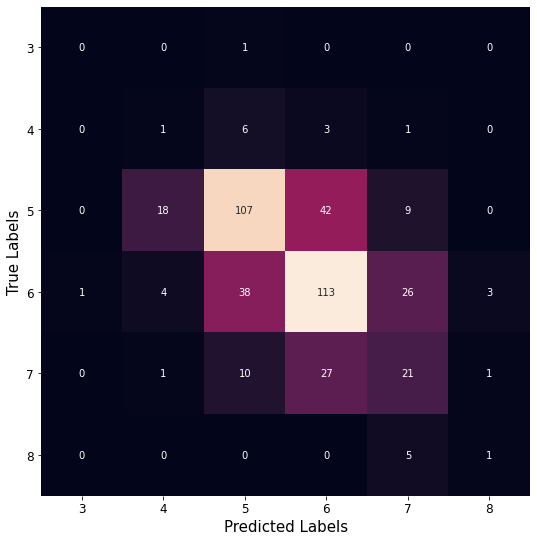

In [40]:
confusion_pred(dc_confusion)

In [41]:
view_dfmetrics(dc)

Training accuracy: 1.0 

Testing accuracy: 0.5791666666666667 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.07      0.06      0.06        17
           5       0.68      0.64      0.66       195
           6       0.57      0.61      0.59       200
           7       0.44      0.46      0.45        61
           8       0.50      0.33      0.40         6

    accuracy                           0.58       480
   macro avg       0.38      0.35      0.36       480
weighted avg       0.58      0.58      0.58       480



# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
log = LogisticRegression(solver='liblinear', C=10)

In [44]:
log_pred = view_metrics(log)

Training accuracy: 0.6103515625 

Testing accuracy: 0.5763097949886105 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        11
           5       0.62      0.72      0.67       176
           6       0.54      0.61      0.57       185
           7       0.54      0.25      0.34        60
           8       0.00      0.00      0.00         6

    accuracy                           0.58       439
   macro avg       0.28      0.26      0.26       439
weighted avg       0.55      0.58      0.55       439



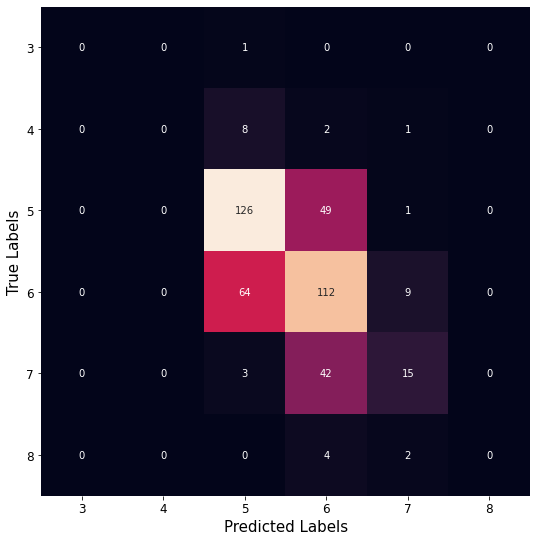

In [45]:
confusion_pred(confusion_matrix(y_test, log_pred))

In [46]:
view_dfmetrics(log)

Training accuracy: 0.5978552278820375 

Testing accuracy: 0.5666666666666667 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.61      0.76      0.68       195
           6       0.53      0.59      0.56       200
           7       0.42      0.08      0.14        61
           8       0.00      0.00      0.00         6

    accuracy                           0.57       480
   macro avg       0.26      0.24      0.23       480
weighted avg       0.52      0.57      0.53       480



# KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)

In [49]:
knn_pred = view_metrics(knn)

Training accuracy: 0.6708984375 

Testing accuracy: 0.5876993166287016 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        11
           5       0.65      0.72      0.68       176
           6       0.57      0.58      0.57       185
           7       0.46      0.40      0.43        60
           8       0.00      0.00      0.00         6

    accuracy                           0.59       439
   macro avg       0.28      0.28      0.28       439
weighted avg       0.56      0.59      0.57       439



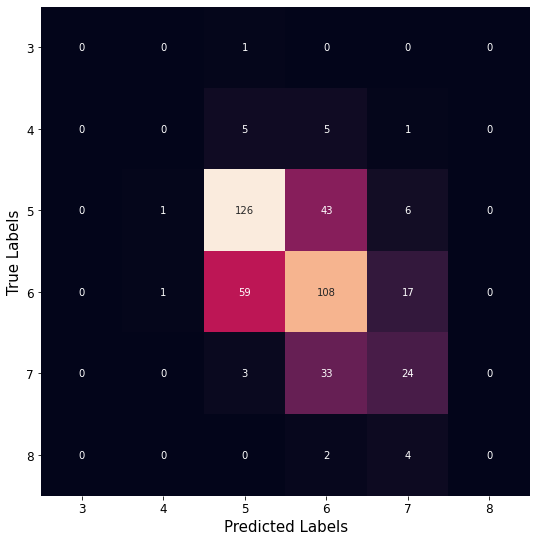

In [50]:
confusion_pred(confusion_matrix(y_test, knn_pred))

# Counting the actual value for the prediction

In [52]:
y_test.value_counts()

6    185
5    176
7     60
4     11
8      6
3      1
Name: quality, dtype: int64

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.